In [15]:
import numpy as np
import pandas as pd
import altair as alt


In [16]:
df = pd.read_csv('year_wise_treatment.csv')

In [24]:
df.year = df.year.astype('int')

In [47]:
import matplotlib.pyplot as plt

In [49]:
alt.Chart(df, title = "Prescription drug price over years").mark_point(\
    ).encode(x = alt.X('year:O', title = 'Year', scale = alt.Scale(zero=False)),\
        y = alt.Y('Avg_Spnd_Per_Dsg_Unt_Wghtd', title = 'Spending per dosage')).properties(width = 500)

alt.Chart(...)

In [89]:
# exclude outliers 
df2 = df[df.Avg_Spnd_Per_Dsg_Unt_Wghtd <= 100]

In [90]:
x = [df2[df2.year == 2017].Avg_Spnd_Per_Dsg_Unt_Wghtd.values, \
        df2[df2.year == 2018].Avg_Spnd_Per_Dsg_Unt_Wghtd.values, \
        df2[df2.year == 2019].Avg_Spnd_Per_Dsg_Unt_Wghtd.values,\
        df2[df2.year == 2020].Avg_Spnd_Per_Dsg_Unt_Wghtd.values, \
        df2[df2.year == 2021].Avg_Spnd_Per_Dsg_Unt_Wghtd.values]

{'whiskers': [<matplotlib.lines.Line2D at 0x1572e91b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1572e9750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1572e8ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x1572e9cf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1572e9fc0>,
 'means': []}

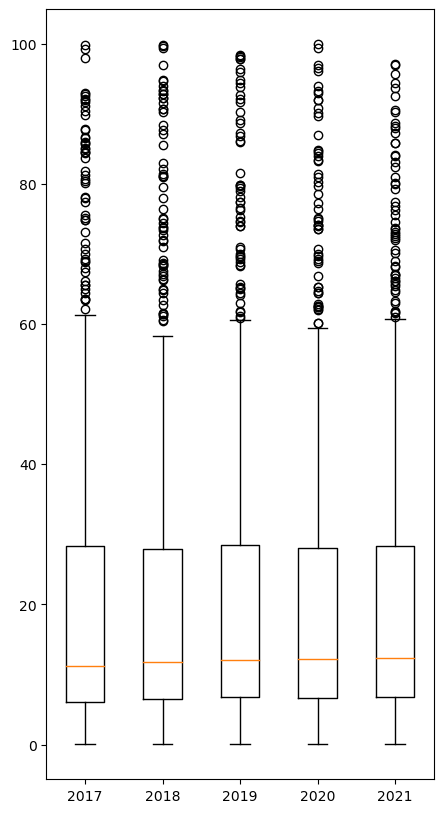

In [91]:
plt.figure(figsize=(5, 10))
plt.boxplot(x, positions= [2017, 2018, 2019, 2020, 2021])

{'whiskers': [<matplotlib.lines.Line2D at 0x157115e70>,
 'caps': [<matplotlib.lines.Line2D at 0x157116410>,
 'boxes': [<matplotlib.lines.Line2D at 0x157115c00>],
 'medians': [<matplotlib.lines.Line2D at 0x1571169b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x157116c80>],
 'means': []}

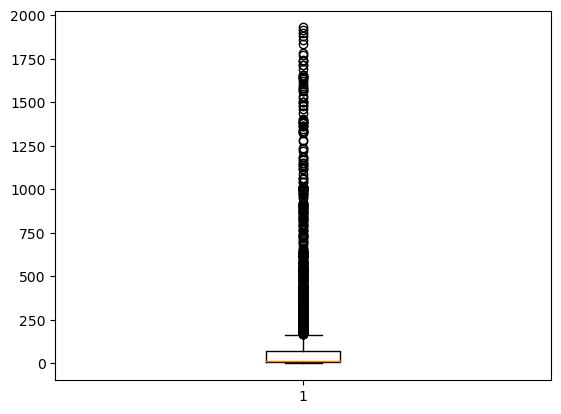

In [81]:
# plt.boxplot(x, positions= [2017, 2018, 2019, 2020, 2021])
df2 = df[df.Avg_Spnd_Per_Dsg_Unt_Wghtd <= 2000]
plt.boxplot(df2.Avg_Spnd_Per_Dsg_Unt_Wghtd)

In [120]:
df_pre_plot = df[df['year'].isin([year for year in [2017, 2018, 2019]])]
df_post_plot = df[df['year'].isin([year for year in [2020, 2021]])]

df_pre_plot1 = df_control[df_control['year'].isin([year for year in [2017, 2018, 2019]])]
df_post_plot1 = df_control[df_control['year'].isin([year for year in [2020, 2021]])]

# pre-expiration
base_pre_c = alt.Chart(df_pre_plot, \
    title = 'Prescription drug price over years').mark_point().encode(
    x= alt.X('year', title = 'Year', scale = alt.Scale(zero=False)),\
    y = alt.Y('Avg_Spnd_Per_Dsg_Unt_Wghtd', title = 'Spending per dosage', scale = alt.Scale(zero=False))
)
fit_pre_c = base_pre_c.transform_regression('year', 'Avg_Spnd_Per_Dsg_Unt_Wghtd').mark_line(color='red')

# post-expiration
base_post_c = alt.Chart(df_post_plot, \
    title = 'Prescription drug price over years').mark_point().encode(
    x= alt.X('year', title = 'Year', scale = alt.Scale(zero=False)),\
    y = alt.Y('Avg_Spnd_Per_Dsg_Unt_Wghtd', title = 'Spending per dosage', scale = alt.Scale(zero=False))
)
fit_post_c = base_post_c.transform_regression('year', 'Avg_Spnd_Per_Dsg_Unt_Wghtd').mark_line(color='red')

# pre-expiration control
base_pre_c1 = alt.Chart(df_pre_plot1, \
    title = 'Prescription drug price over years').mark_point().encode(
    x= alt.X('year', title = 'Year', scale = alt.Scale(zero=False)),\
    y = alt.Y('Avg_Spnd_Per_Dsg_Unt_Wghtd', title = 'Spending per dosage', scale = alt.Scale(zero=False))
)
fit_pre_c1 = base_pre_c1.transform_regression('year', 'Avg_Spnd_Per_Dsg_Unt_Wghtd').mark_line(color='blue')

# post-expiration control
base_post_c1 = alt.Chart(df_post_plot1, \
    title = 'Prescription drug price over years').mark_point().encode(
    x= alt.X('year', title = 'Year', scale = alt.Scale(zero=False)),\
    y = alt.Y('Avg_Spnd_Per_Dsg_Unt_Wghtd', title = 'Spending per dosage', scale = alt.Scale(zero=False))
)
fit_post_c1 = base_post_c1.transform_regression('year', 'Avg_Spnd_Per_Dsg_Unt_Wghtd').mark_line(color='blue')

# add vertical line for the legalization year
vertline = (
        alt.Chart(pd.DataFrame({"Date": 2019, "color": ["green"]}))
        .mark_rule(strokeDash=[5, 3])
        .encode(x="Date:Q", color=alt.Color("color:N", scale=None))
    )

fit_post_c + fit_pre_c + fit_pre_c1 + fit_post_c1 + vertline

alt.LayerChart(...)

In [117]:
# pre-expiration
base_pre_c = alt.Chart(df_pre_plot, \
    title = 'Prescription drug price over years').mark_point().encode(
    x= alt.X('year', title = 'Year', scale = alt.Scale(zero=False),axis = alt.Axis(format= ',.0f')),\
    y = alt.Y('Avg_Spnd_Per_Dsg_Unt_Wghtd', title = 'Spending per dosage', scale = alt.Scale(zero=False))
)
fit_pre_c = base_pre_c.transform_regression('year', 'Avg_Spnd_Per_Dsg_Unt_Wghtd').mark_line(color='red')

fit_pre_c

alt.Chart(...)